# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Yermia Turangan
- **Email:** jeremiaturangan@gmail.com / m309b4ky4529@bangkit.academy
- **ID Dicoding:** yermia_turangan

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh kondisi cuaca (suhu, kelembaban, kecepatan angin) terhadap jumlah penyewaan sepeda setiap hari?
- Apakah ada tren musiman dalam jumlah penyewaan sepeda, dan bagaimana perubahan ini mempengaruhi pengguna terdaftar dan tidak terdaftar?

## Import Semua Packages/Library yang Digunakan

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [59]:
data_hari = pd.read_csv('day.csv')
data_hari.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Data tipe int dan kualitatif to index sesuai readme dataset


### Assessing Data

In [60]:
data_hari.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Dataset memiliki 731 entri dan 16 kolom berarti ada 731 hari rental
- Tipe data yang digunakan saat ini adalah int64, float64, dan object.
- Tidak ada kolom dengan nilai null (non-null count sama dengan total entri).

In [61]:
data_hari.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Rata-rata rental tiap weekend lebih banyak dari pada tiap hari kerja
- xxx

##### Cek Tipe Data

In [62]:
data_hari.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

**Insight:**
- Kolom dteday bertipe object, sebaiknya diubah menjadi datetime untuk kemudahan analisis waktu.
- Kolom kategori seperti season, yr, mnth, dll., saat ini bertipe numerik (int64), sebaiknya diubah menjadi tipe category.

### Cleaning Data

##### Cek Data Hilang

In [63]:
print("Data hilang: ", data_hari.isnull().sum())


Data hilang:  instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
- Tidak ada missing values
- Tidak diperlukan penanganan missing values

##### Cek Data Duplikat

In [64]:
print("Data Duplikat: ", data_hari.duplicated().sum())

Data Duplikat:  0


**Insight:**
- Tidak ada baris duplikat dalam dataset.
- Data dianggap unik dan nda perlu penghapusan duplikat.

#### Beberapa perubahan untuk kebutuhan analisis

##### Ubah kolom 'dteday' menjadi datetime

In [65]:
data_hari['dteday'] = pd.to_datetime(data_hari['dteday'])

**Insight:**
- Kolom dteday sekarang bertipe datetime64[ns].
- Mempermudah analisis yang berhubungan dengan tanggal.

##### Mengubah beberapa Kolom di Kategori Menjadi Tipe Category

In [66]:
category_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

for col in category_columns:
    data_hari[col] = data_hari[col].astype('category')

**Insight:**
- Mengubah tipe data ke category meningkatkan efisiensi memori.
- Memudahkan dalam melakukan analisis kategori dan plotting.

##### Menambahkan Label pada Kolom Kategori sesuai deskripsi dataset

In [67]:
# Mapping kolom 'season'
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
data_hari['season'] = data_hari['season'].map(season_mapping)

# Mapping kolom 'weathersit'
weather_mapping = {
    1: 'Clear',
    2: 'Mist + Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Snow'
}
data_hari['weathersit'] = data_hari['weathersit'].map(weather_mapping)

# Mapping kolom 'weekday'
weekday_mapping = {
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
    4: 'Thursday', 5: 'Friday', 6: 'Saturday'
}
data_hari['weekday'] = data_hari['weekday'].map(weekday_mapping)

# Mapping kolom 'mnth'
month_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
data_hari['mnth'] = data_hari['mnth'].map(month_mapping)


In [68]:
data_hari.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

**Insight:**
- Interpretasi dan visualisasi data.
- Menghindari kebingungan saat membaca grafik atau tabel.

##### Cek outlier

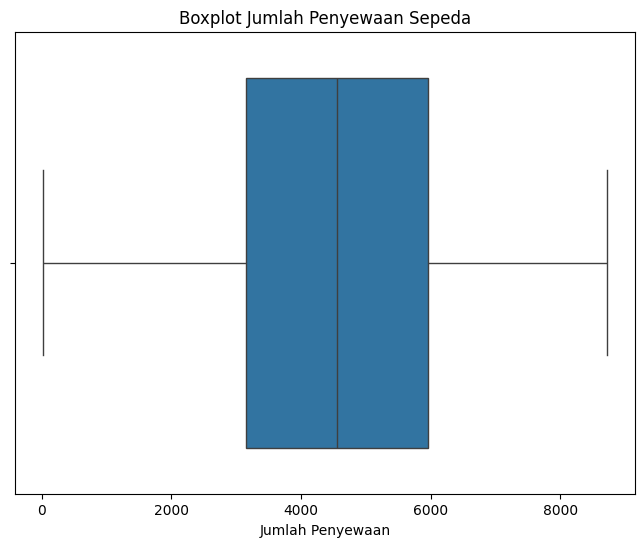

In [69]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_hari['cnt'])
plt.title('Boxplot Jumlah Penyewaan Sepeda')
plt.xlabel('Jumlah Penyewaan')
plt.show()

**Insight:**
- Dari boxplot, terlihat beberapa outlier di sisi nilai tinggi.
- Karena data penyewaan sepeda bisa bervariasi tergantung hari libur atau event khusus, kita perlu mempertimbangkan konteks sebelum menghapus outlier.
- Jika outlier dianggap wajar dalam konteks bisnis, maka tidak perlu dihapus.

## Exploratory Data Analysis (EDA)

In [70]:
data_hari.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,January,0,Saturday,0,Mist + Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,January,0,Sunday,0,Mist + Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,January,0,Monday,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,January,0,Tuesday,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,January,0,Wednesday,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Explore ...

##### Melihat berapa banyak jumlah penyewa biasa dibandingkan dengan penyewa yang terdaftar atau saya anggap berlangganan

In [71]:
total_registered = data_hari['registered'].sum()
total_casual = data_hari['casual'].sum()
total_cnt = data_hari['cnt'].sum()

print(f"Total Penyewaan Pengguna Terdaftar: {total_registered}")
print(f"Total Penyewaan Pengguna Kasual: {total_casual}")
print(f"Total Penyewaan Keseluruhan: {total_cnt}")

Total Penyewaan Pengguna Terdaftar: 2672662
Total Penyewaan Pengguna Kasual: 620017
Total Penyewaan Keseluruhan: 3292679


**Insight:**
- Penyewa langganan lebih banyak menggunakan sepeda


##### Distribusi Penyewaan Sepeda

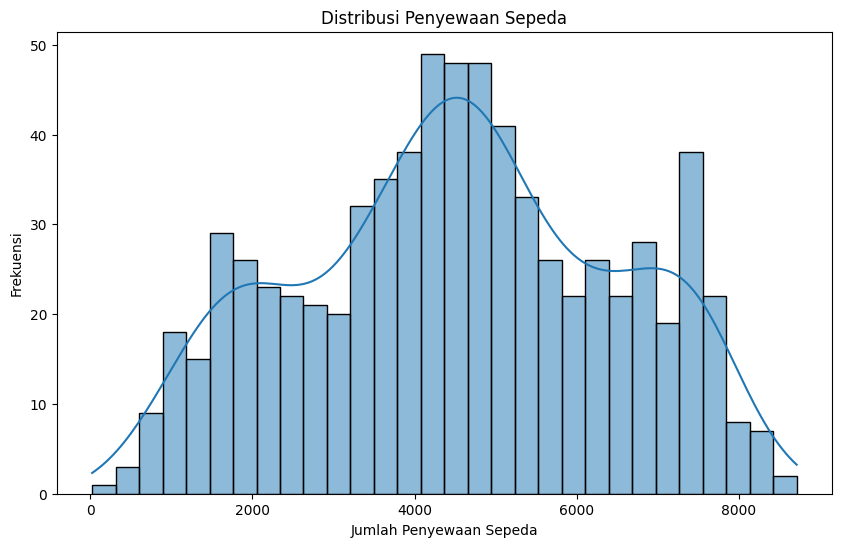

In [72]:
plt.figure(figsize=(10, 6))
sns.histplot(data_hari['cnt'], kde=True, bins=30)
plt.title('Distribusi Penyewaan Sepeda')
plt.xlabel('Jumlah Penyewaan Sepeda')
plt.ylabel('Frekuensi')
plt.show()


##### Rata-rata penyewaan berdasarkan hari dalam seminggu

/var/folders/3n/7sqpd9fs6hj255clf3l1q_340000gp/T/ipykernel_35112/1931093204.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_perminggu = data_hari.groupby('weekday')['cnt'].mean()


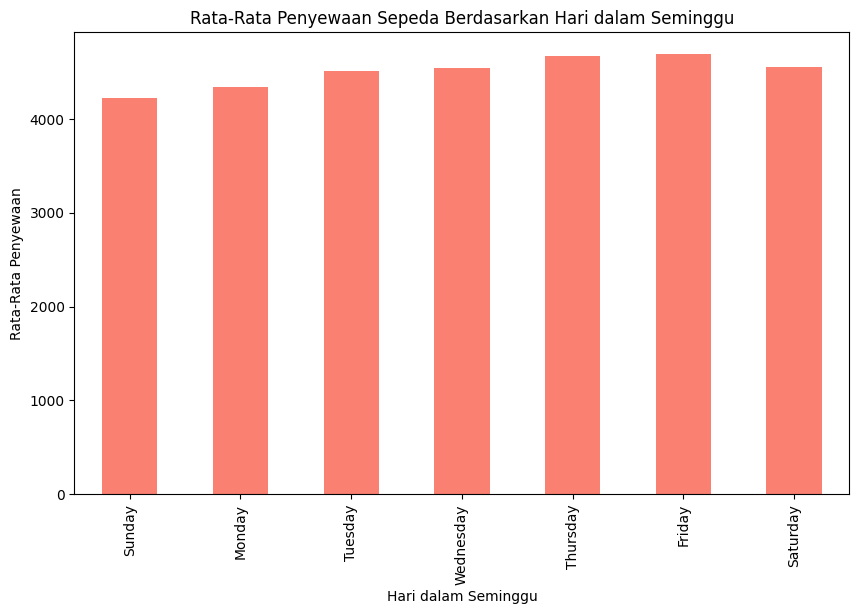

In [73]:
mean_perminggu = data_hari.groupby('weekday')['cnt'].mean()

plt.figure(figsize=(10, 6))
mean_perminggu.plot(kind='bar', color='salmon')
plt.title('Rata-Rata Penyewaan Sepeda Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Rata-Rata Penyewaan')
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh kondisi cuaca (suhu, kelembaban, kecepatan angin) terhadap jumlah penyewaan sepeda setiap hari?

##### Pengaruh Cuaca

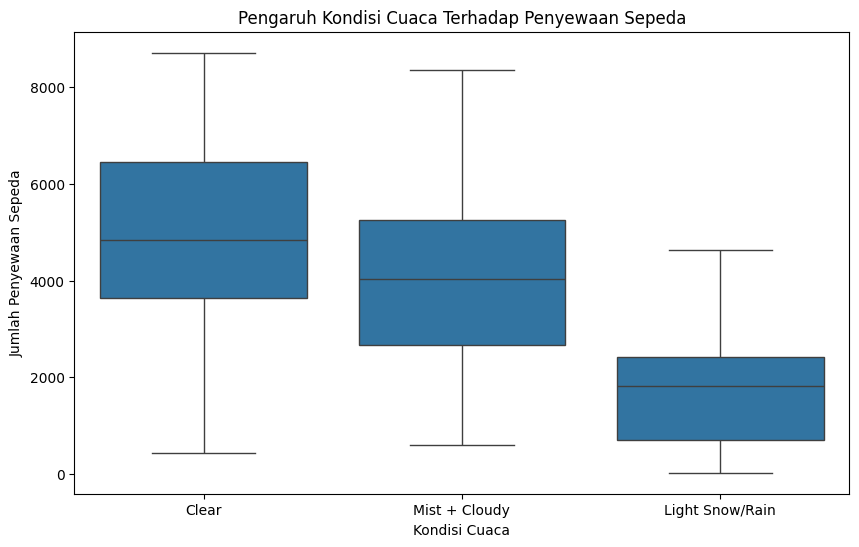

In [74]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=data_hari)
plt.title('Pengaruh Kondisi Cuaca Terhadap Penyewaan Sepeda')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

**Insight:**
-  terlihat bahwa cuaca yang cerah (Clear) memiliki median jumlah penyewaan sepeda tertinggi, diikuti oleh kondisi berkabut/berawan (Mist + Cloudy), dan terendah pada kondisi hujan ringan/salju ringan (Light Snow/Rain).
-  menunjukkan bahwa orang cenderung lebih banyak menyewa sepeda saat cuaca cerah, dan penyewaan menurun signifikan saat cuaca buruk.

##### Pengaruh Musim

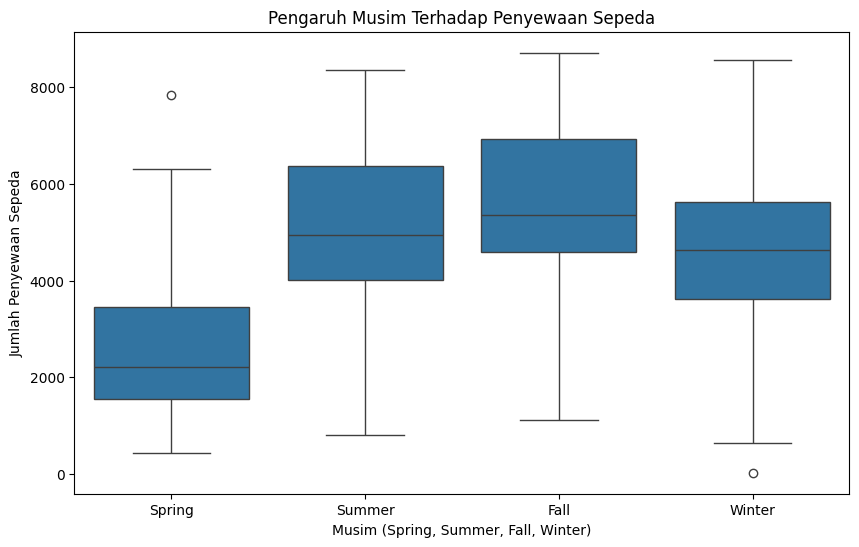

In [75]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=data_hari)
plt.title('Pengaruh Musim Terhadap Penyewaan Sepeda')
plt.xlabel('Musim (Spring, Summer, Fall, Winter)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

**Insights:**
- menunjukkan variasi penyewaan berdasarkan musim. Musim gugur (Fall) dan musim panas (Summer) memiliki median penyewaan tertinggi, diikuti oleh musim semi (Spring), dan terendah di musim dingin (Winter).
- mengindikasikan bahwa suhu yang lebih hangat dan kondisi cuaca yang lebih baik di musim gugur dan musim panas mendorong lebih banyak orang untuk menyewa sepeda.

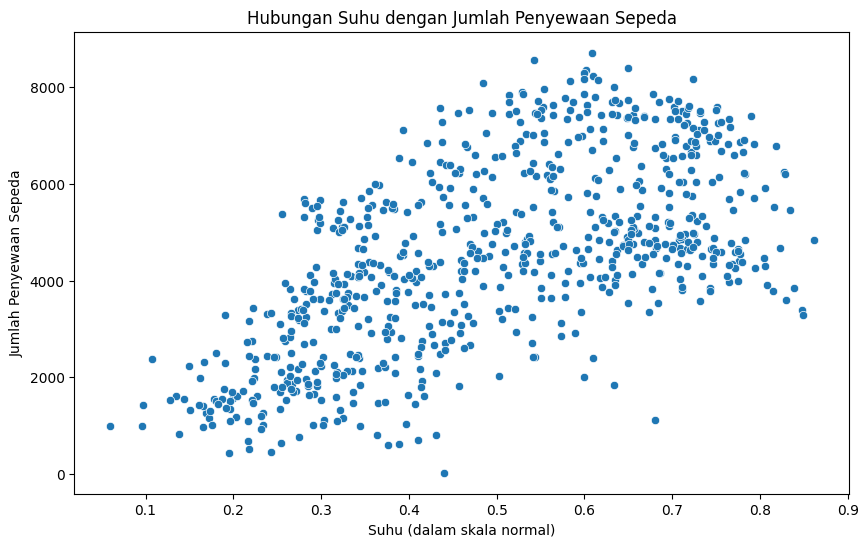

In [76]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=data_hari)
plt.title('Hubungan Suhu dengan Jumlah Penyewaan Sepeda')
plt.xlabel('Suhu (dalam skala normal)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

**Insights:**
- Semakin tinggi suhu (dalam skala normal), semakin tinggi jumlah penyewaan sepeda. Namun, terlihat juga bahwa pada suhu sangat tinggi (di atas 0.7 dalam skala normal), ada sedikit penurunan dalam jumlah penyewaan maksimum.

### Pertanyaan 2: Apakah ada tren di hari weekday dan weekend dalam jumlah penyewaan sepeda, dan bagaimana perubahan ini mempengaruhi pengguna terdaftar dan tidak terdaftar?

##### Hari kerja dan weekend

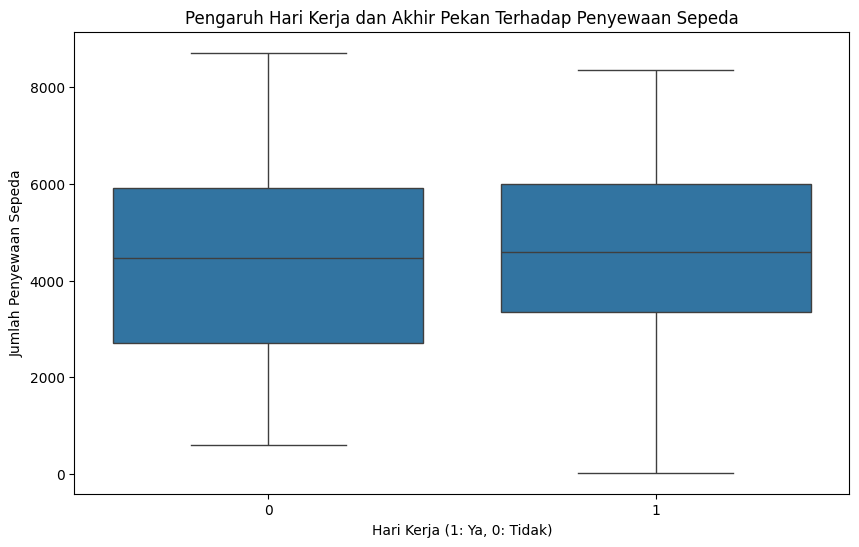

In [77]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='workingday', y='cnt', data=data_hari)
plt.title('Pengaruh Hari Kerja dan Akhir Pekan Terhadap Penyewaan Sepeda')
plt.xlabel('Hari Kerja (1: Ya, 0: Tidak)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

**Insight:**
- Median penyewaan sepeda pada hari kerja dan akhir pekan relatif sama, namun distribusi pada akhir pekan lebih lebar.
- mengindikasikan bahwa ada variabilitas yang lebih tinggi dalam jumlah penyewaan pada akhir pekan, mungkin karena faktor cuaca atau acara khusus memiliki dampak lebih besar.

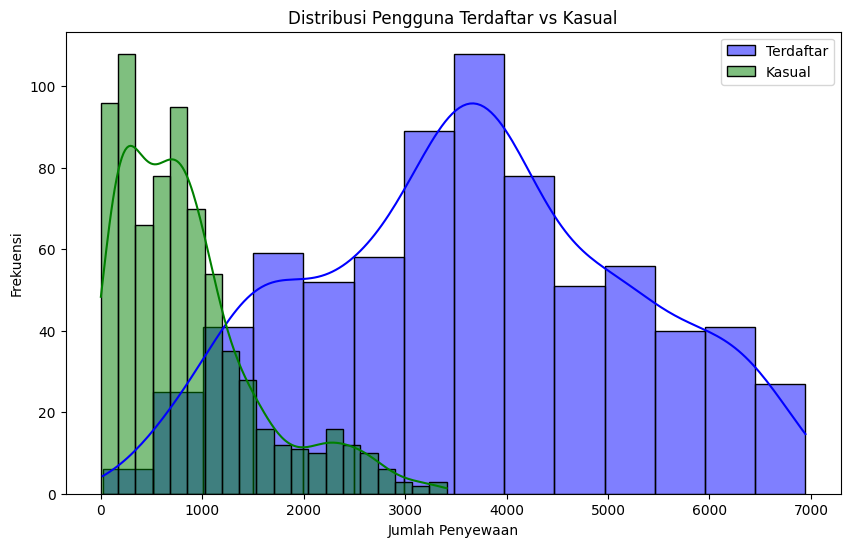

In [78]:
plt.figure(figsize=(10, 6))
sns.histplot(data_hari['registered'], color='blue', label='Terdaftar', kde=True)
sns.histplot(data_hari['casual'], color='green', label='Kasual', kde=True)
plt.title('Distribusi Pengguna Terdaftar vs Kasual')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

**Insights:**
- Pengguna terdaftar memiliki distribusi yang lebih condong ke kanan, dengan puncak penyewaan antara 3000-4000 kali.
- Pengguna kasual memiliki distribusi yang lebih condong ke kiri, dengan mayoritas penyewaan di bawah 1000 kali.

## Conclusion

- Pertanyaan 1:
- Cuaca cerah dan suhu yang hangat secara konsisten berkorelasi dengan peningkatan jumlah penyewaan sepeda. Orang jadi lebih sering sewa di cuaca yang cerah dan suhu yang hangat. Disamping itu musim memiliki pengaruh signifikan, dengan penyewaan tertinggi di musim gugur dan musim panas, menengah di musim semi, dan terendah di musim dingin. Terdapat hubungan positif antara suhu dan jumlah penyewaan, namun ada indikasi bahwa suhu yang terlalu tinggi mungkin sedikit mengurangi penyewaan. Kondisi cuaca buruk seperti hujan ringan atau salju ringan memiliki dampak negatif yang signifikan terhadap jumlah penyewaan sepeda.
- Pertanyaan 2:
- Pengguna terdaftar cenderung menyewa sepeda lebih sering dan konsisten, mungkin menggunakannya untuk commuting sehari-hari.
Pengguna kasual memiliki frekuensi penyewaan yang lebih rendah, mungkin lebih banyak untuk rekreasi atau penggunaan sesekali. Terdapat indikasi tren musiman mingguan, dengan pola penyewaan yang berbeda antara hari kerja dan akhir pekan. Pengguna terdaftar menunjukkan pola penggunaan yang lebih konsisten dan frekuen, sementara pengguna kasual cenderung menyewa lebih jarang.Meskipun tidak ada data musiman tahunan yang eksplisit, variasi dalam penyewaan akhir pekan mungkin mencerminkan pengaruh musiman yang lebih luas (misalnya, musim panas vs musim dingin).